In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from dis_bg_remover import remove_background

In [2]:
# Path to the input image and model
image_path = "E:\\My projects\\dis_librarie\\sample_inputs\\frame_0439.jpg"
model_path = "E:\\My projects\\dis_librarie\\Model_files\\isnet_dis.onnx"
background_image_path = "C:\\Users\\SaiduluShaik\\Downloads\\images.jpg"  # Path to your desired background

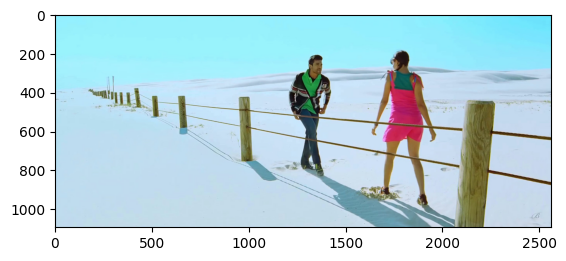

In [3]:
# Load and display the input image
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

In [4]:
# Remove background
img, mask = remove_background(model_path, image_path)


In [5]:
# Save the outputs
cv2.imwrite('generated.png', img)
cv2.imwrite('mask.jpg', mask)

True

In [6]:
# Load the custom background image
custom_background = cv2.imread(background_image_path, cv2.IMREAD_UNCHANGED)

In [7]:
# Resize the background image to match the input image dimensions
custom_background = cv2.resize(custom_background, (img.shape[1], img.shape[0]))


In [8]:
# Ensure the background image has an alpha channel
if custom_background.shape[2] == 3:
    custom_background = cv2.cvtColor(custom_background, cv2.COLOR_BGR2BGRA)

In [9]:
# Create the alpha mask
alpha_mask = (img[:, :, 3] / 255.0).reshape(img.shape[0], img.shape[1], 1)

In [10]:
# Separate the foreground and background
foreground = img[:, :, :3].astype(np.float32)  # Use only RGB channels of the foreground
background = custom_background[:, :, :3].astype(np.float32)  # Use only RGB channels of the custom background


In [11]:
# Blend the images
blended_image = (1 - alpha_mask) * background + alpha_mask * foreground
blended_image = np.uint8(blended_image)

In [12]:
# Convert from BGR to RGB for displaying in Matplotlib
blended_image_rgb = cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB)

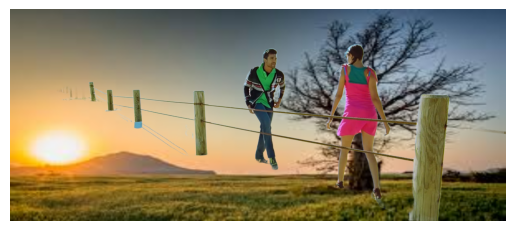

In [13]:
# Display the image with the custom background
plt.imshow(blended_image_rgb)
plt.axis('off')  # Hide the axes
plt.show()